# Prepare SL Data for Deep Learning analysis

- **Part 1**
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2023/03/20
- last update : 2023/03/20
- FORS2 : https://github.com/ericnuss/fors2
- Result of StarLight : /sps/lsst/groups/photoz/fors2/FORS2/ResStarlight



          /Users/dagoret/MacOSX/GitHub/LSST/FORS2>ls -l
              total 0
              drwxrwsr-x  3 dagoret  staff   96 Aug 21  2018 ResStarlight
              drwxr-xr-x  9 dagoret  staff  288 Dec 19 18:01 fors2

## Import

In [1]:
import os,sys,re
import h5py
from astropy.table import Table

In [2]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
import pandas as pd
from itertools import cycle, islice


In [3]:
from scipy import ndimage

#from scipy import interp as scinterp
from scipy.interpolate import interp1d

import glob
import collections
#from def_raw_seds import *

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (4, 4),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [5]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [6]:
from def_raw_seds import *

In [7]:
from raw_data_analysis import *

In [8]:
#from spectroscopy import *

In [9]:
# Import the primary photometry classes from rubin_sim.photUtils

import rubin_sim.phot_Utils.Bandpass as Bandpass
import rubin_sim.phot_Utils.Sed as Sed
from rubin_sim.data import get_data_dir

In [10]:
#pysynphot_root_path=os.environ['PYSYN_CDBS']
#path_sed_calspec=os.path.join(pysynphot_root_path,'calspec')
# pysynphot
#import pysynphot as S
#S.refs.setref(area=1)
#S.refs.getref()

## Start

In [11]:
cwd=os.path.abspath("")
main_dir = cwd
print(f"notebook current executing path : {cwd}")

notebook current executing path : /Users/sylvie/MacOSX/GitHub/LSST/PhotoZ_PhD/DeepLearning/preparedata


## Configuration

### SL

## Start

### Catalog

In [12]:
t = Table.read(filename_fits_catalog)

/Users/sylvie/mambaforge/envs/rubin/lib/python3.11/site-packages/astropy/io/fits/connect.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = data[col.name] == col.null


In [13]:
t

ID,m_ID,RAJ2000,DEJ2000,z,u_z,Rmag,RV,e_RV,RT,Nsp,Lines
,,deg,deg,,,mag,km / s,km / s,,,
int16,bytes1,float64,float64,float64,bytes1,float64,int32,int16,float64,int16,bytes77
1,,13.52815,-28.40486,0.55409,,20.79,166227,55,10.0,1,"[OII],H8,K,H"
2,,13.52997,-28.44776,0.34555,,21.18,103665,40,12.3,1,"K,H,G,H{beta}"
3,,13.52552,-28.4208,0.6866,,21.45,210642,48,11.6,4,"[OII],H9,K,H,H{beta},[OIII],H8"
4,,13.52216,-28.40914,0.68653,,21.62,205959,123,10.6,1,"[OII],H9,K,H,G,H{beta}"
7,,13.50974,-28.42972,0.32371,,22.34,97111,11,16.7,6,"[OII],H{beta},[OIII],H{alpha}"
9,,13.50219,-28.40641,0.29266,,21.6,87798,58,13.1,1,"H9,H8,K,H"
11,,13.49724,-28.39487,0.62688,,22.09,188063,17,24.3,3,"[OII],H10,H8,K,H,H{delta}"
12,,13.49584,-28.39125,0.2973,,21.97,89189,30,14.8,2,"[OII],H10,H9,H8,K,H"


### List

In [14]:
lst=fors2_jct_SL() #remet les spectres dans le rest frame (ie a z=0)

In [15]:
lst = sorted(lst)
print(lst)

['SPEC102', 'SPEC106', 'SPEC107', 'SPEC109', 'SPEC110', 'SPEC111', 'SPEC112', 'SPEC113', 'SPEC114', 'SPEC115', 'SPEC117', 'SPEC118', 'SPEC120', 'SPEC121', 'SPEC123', 'SPEC127', 'SPEC128', 'SPEC13', 'SPEC132', 'SPEC134', 'SPEC135', 'SPEC137', 'SPEC138', 'SPEC141', 'SPEC149', 'SPEC151', 'SPEC152', 'SPEC156', 'SPEC160', 'SPEC161', 'SPEC164', 'SPEC171', 'SPEC178', 'SPEC179', 'SPEC181', 'SPEC182', 'SPEC183', 'SPEC184', 'SPEC185', 'SPEC186', 'SPEC187', 'SPEC188', 'SPEC189', 'SPEC19', 'SPEC191', 'SPEC192', 'SPEC193', 'SPEC194', 'SPEC196', 'SPEC197', 'SPEC198', 'SPEC2', 'SPEC204', 'SPEC205', 'SPEC210', 'SPEC214', 'SPEC218', 'SPEC221', 'SPEC222', 'SPEC223', 'SPEC226', 'SPEC227', 'SPEC231', 'SPEC233', 'SPEC234', 'SPEC235', 'SPEC236', 'SPEC237', 'SPEC238', 'SPEC24', 'SPEC240', 'SPEC242', 'SPEC243', 'SPEC244', 'SPEC245', 'SPEC246', 'SPEC248', 'SPEC249', 'SPEC25', 'SPEC250', 'SPEC252', 'SPEC253', 'SPEC258', 'SPEC259', 'SPEC260', 'SPEC261', 'SPEC262', 'SPEC264', 'SPEC265', 'SPEC266', 'SPEC267', 'SPE

In [16]:
all_specfilenames = os.listdir(path_BC)

In [17]:
all_specfilenames = sorted(all_specfilenames)

In [18]:
all_numbers = [ int(re.findall('^SPEC(.*)_HZ4_BC[.]txt$',fn)[0]) for fn in all_specfilenames ]

In [19]:
all_numbers = sorted(all_numbers)

In [20]:
NSED = len(all_numbers)
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NSED)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NSED), alpha=1)

In [21]:
cut = t["ID"] == 3
t[cut]

ID,m_ID,RAJ2000,DEJ2000,z,u_z,Rmag,RV,e_RV,RT,Nsp,Lines
,,deg,deg,,,mag,km / s,km / s,,,
int16,bytes1,float64,float64,float64,bytes1,float64,int32,int16,float64,int16,bytes77
3,,13.52552,-28.4208,0.6866,,21.45,210642,48,11.6,4,"[OII],H9,K,H,H{beta},[OIII],H8"


# Read all SEDS and noremalised them in a range 0 - 10000 nm

In [22]:
all_normspectra = []
all_integ = []
all_wl = []
all_tag = []
all_sed = []

all_redshifts = []
all_num = []
all_ra = []
all_dec = []
all_Rmag = []
all_RV = []
all_eRV = []
all_RT = []
all_Nsp = []


for the_num in all_numbers:
    
    tcut = t["ID"] == the_num
    redshift = t[tcut]["z"].value[0]
    lines = t[tcut]["Lines"].value[0]
    filename = f"SPEC{the_num}_HZ4_BC.txt"
    tag = f"SPEC{the_num} , z={redshift:.2f}, lines={lines}"
    fullfilename = os.path.join(path_BC,filename)
    the_sed=SED(fullfilename,label=tag)
    all_sed.append(the_sed)
    arr = np.loadtxt(fullfilename)
    
    # select wavelength in an appropriate range 
    wl=arr[:-1,0]  
    wlrange = np.where(np.logical_and(wl>=0,wl<=10000))[0]
    
    wl=arr[wlrange,0] 
    flambda=arr[wlrange,1]
    
    # normalize spectrum wrt its integral between 0-10000 angstrom
    integ = np.trapz(flambda,wl)
    all_wl.append(wl)
    all_normspectra.append(flambda/integ)
    all_tag.append(tag)
    
    # RAJ2000	DEJ2000	z	u_z	Rmag	RV	e_RV	RT	Nsp	
    all_redshifts.append(redshift)
    all_num.append(the_num) 
    all_ra.append(t["RAJ2000"]) 
    all_dec.append(t["DEJ2000"]) 
    all_Rmag.append(t["Rmag"])
    all_RV.append(t["RV"])
    all_eRV.append(t["e_RV"])
    all_RT.append(t["RT"])
    all_Nsp.append(t["Nsp"])
    

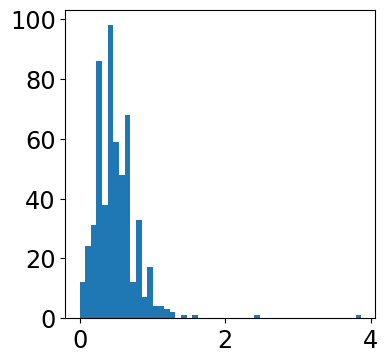

In [23]:
plt.hist(all_redshifts,bins=50);

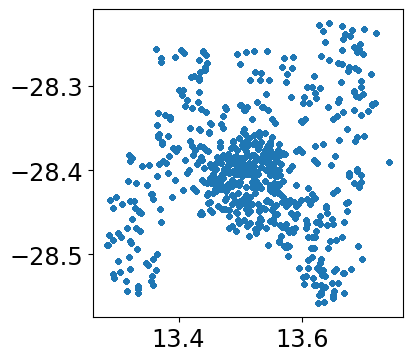

In [41]:
plt.scatter(all_ra,all_dec,s=10,marker="o",alpha=0.1)

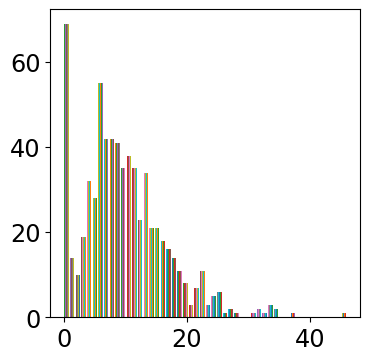

In [25]:
plt.hist(all_RT,bins=50);

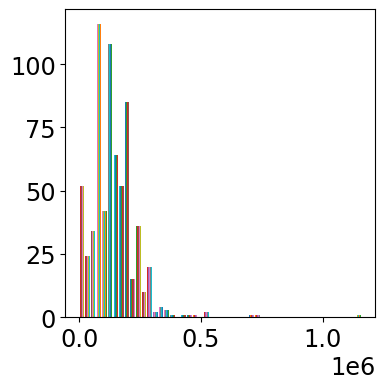

In [26]:
plt.hist(all_RV,bins=50);

# Interpolation

https://stackoverflow.com/questions/20928136/input-and-output-numpy-arrays-to-h5py

In [27]:
WL = np.arange(0,10000,1)

In [28]:
NWL = len(WL)
NSAMPLES = len(all_normspectra)
flux_out=np.zeros((NSAMPLES,NWL))

In [29]:
for idx in range(NSED):
    y = np.interp(WL, all_wl[idx], all_normspectra[idx])
    flux_out[idx,:] = y  

# Save in a file 

In [30]:
with h5py.File('SLspectra.hdf5', 'w') as hf:
    hf.create_dataset("flambda", data = flux_out,dtype="float32")
    hf.create_dataset("wl", data = WL,dtype="float32")
    hf.create_dataset("redshift", data = all_redshifts,dtype="float32")

In [31]:
hf.close()

In [32]:
if 0:
    #plt.figure(figsize=(16,20))
    for idx in range(NSED):
        plt.figure(figsize=(16,2))
        #plt.plot(all_wl[idx],all_normspectra[idx], color=all_colors[idx],label=all_tag[idx])
        plt.plot(WL,data_out[idx,:], color=all_colors[idx],label=all_tag[idx])
        plt.legend(loc="upper right")
        plt.grid()
        #plt.axvline(4150,color="k")
        #plt.axvline(4250,color="k")
        #plt.ylim(-0.02,0.4)
        #plt.xlim(0.,20000.)
    plt.show()

# Read again the data

In [33]:
with h5py.File('SLspectra.hdf5', 'r') as hf:
    data_in = hf['flambda'][:]
    wl_in = hf['wl'][:]


In [34]:
data_in.shape

(550, 10000)

In [35]:
wl_in.shape

(10000,)

In [36]:
#plt.figure(figsize=(16,20))
if 0:
    for idx in range(NSED):
        plt.figure(figsize=(16,2))
        #plt.plot(all_wl[idx],all_normspectra[idx], color=all_colors[idx],label=all_tag[idx])
        plt.plot(wl_in,data_in[idx,:], color=all_colors[idx],label=all_tag[idx])
        plt.legend(loc="upper right")
        plt.grid()
        #plt.axvline(4150,color="k")
        #plt.axvline(4250,color="k")
        #plt.ylim(-0.02,0.4)
        #plt.xlim(0.,20000.)
    plt.show()